In [1]:
import os
import cv2
import numpy as np
from skimage.filters import sobel
from skimage import exposure
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import normalize
from sklearn.svm import SVC


warnings.filterwarnings("ignore")

In [4]:

my_arrays_final = np.load("/Users/rohitgulve/Documents/Applied_Machine_Learning/data3a/car_final_data.npz", allow_pickle=True)


In [5]:
print(my_arrays_final['images'].shape)


(7566,)


In [6]:
print(my_arrays_final['labels'].shape)


(7566,)


In [8]:
images = my_arrays_final['images']
labels = my_arrays_final['labels']

In [9]:
print('Shape of images:', images.shape)
print('Shape of labels:', labels.shape)

Shape of images: (7566,)
Shape of labels: (7566,)


Number of keypoints: 391
Descriptors shape: (391, 128)


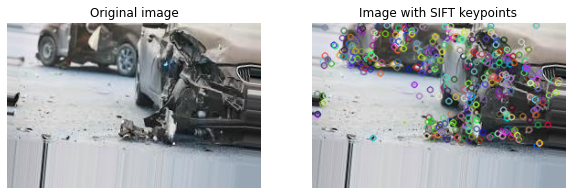

Number of keypoints: 195
Descriptors shape: (195, 128)


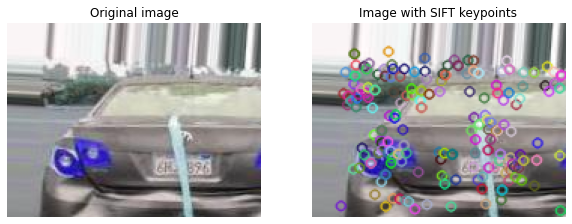

Number of keypoints: 408
Descriptors shape: (408, 128)


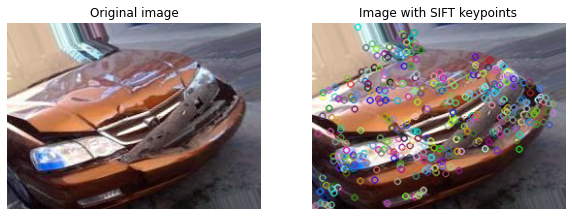

Number of keypoints: 181
Descriptors shape: (181, 128)


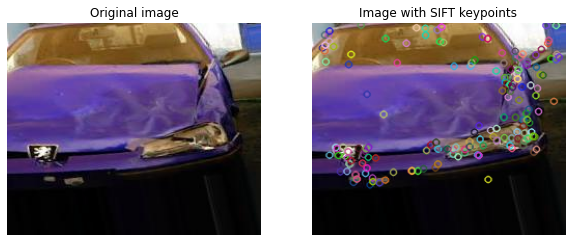

Number of keypoints: 157
Descriptors shape: (157, 128)


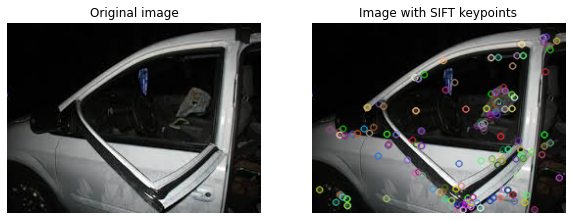

Number of keypoints: 293
Descriptors shape: (293, 128)


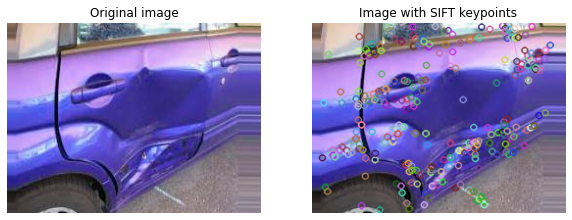

Number of keypoints: 469
Descriptors shape: (469, 128)


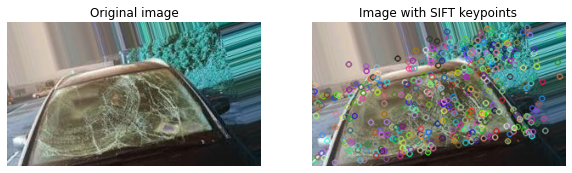

Number of keypoints: 439
Descriptors shape: (439, 128)


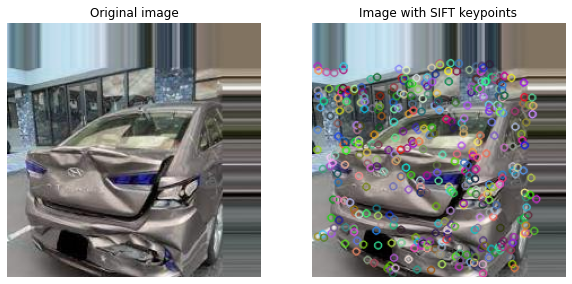

Number of keypoints: 144
Descriptors shape: (144, 128)


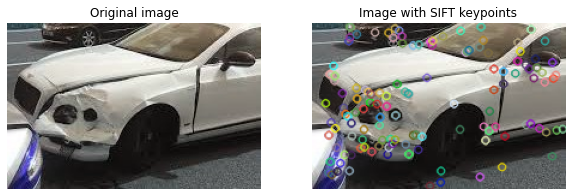

Number of keypoints: 432
Descriptors shape: (432, 128)


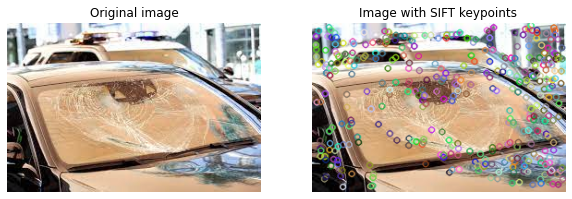

In [15]:
for i in range(4000, 4010):
    image_array = my_arrays_final['images'][i]
    # print(image_array)


    # Initialize the SIFT feature detector
    sift = cv2.SIFT_create()

    # Detect the SIFT features in the image
    keypoints, descriptors = sift.detectAndCompute(image_array, None)
    print("Number of keypoints:", len(keypoints))
    print("Descriptors shape:", descriptors.shape)

    # Draw the keypoints on the original image
    image_with_keypoints = cv2.drawKeypoints(image_array, keypoints, None)

#     # Show the image with keypoints
#     cv2.imshow("Image with keypoints", image_with_keypoints)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
# Plot the original image and the image with keypoints
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    ax[0].imshow(image_array, cmap="gray")
    ax[0].set_title("Original image")
    ax[0].axis("off")
    ax[1].imshow(image_with_keypoints)
    ax[1].set_title("Image with SIFT keypoints")
    ax[1].axis("off")
    plt.show()


In [11]:
# fig, axes = plt.subplots(figsize=(16,7))

histograms = []
for image in images:
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # Calculate histogram of grayscale image
    hist, _ = np.histogram(gray_image, bins=256, range=(0, 256))
    # Add histogram to list
    histograms.append(hist)

# Convert list of histograms to numpy array
histograms = np.array(histograms)

# # Visualize histograms for first 100 images
# for i in range(100):
#     plt.plot(histograms[i], color='blue', alpha=0.5)
# plt.xlabel('Pixel Intensity')
# plt.ylabel('Frequency')
# plt.show()

In [16]:
print(histograms.shape)


(7566, 256)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(histograms, labels, test_size=0.2, random_state=42)


In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((6052, 256), (1514, 256), (6052,), (1514,))

In [20]:
# Perform PCA to reduce the dimensionality of the histogram features
pca = PCA(n_components=2)
hist_pca = pca.fit_transform(X_train)


In [21]:
hist_pca


array([[-527.98294678, -605.67817754],
       [-556.93314803, 3019.87390925],
       [-634.36154135,  468.22542581],
       ...,
       [-508.36750362, 2219.81603405],
       [-493.69088004,  -47.90871014],
       [-445.36807816,  599.19271476]])

In [22]:
nb_pca = GaussianNB()
nb_pca.fit(hist_pca, y_train)

GaussianNB()

In [23]:
X_train_pca = pca.transform(X_train)


In [24]:
accuracy = nb_pca.score(X_train_pca, y_train)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 34.07%


In [25]:
X_test_pca = pca.transform(X_test)


In [26]:
accuracy = nb_pca.score(X_test_pca, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 36.59%


In [27]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [28]:
y_pred_train = nb.predict(X_train)


In [29]:
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy)

Accuracy: 0.4444811632518176


In [30]:
y_pred_test = nb.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)


Accuracy: 0.45904887714663145


In [32]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.52      0.48      0.50       530
           1       0.39      0.38      0.39       473
           2       0.47      0.51      0.49       511

    accuracy                           0.46      1514
   macro avg       0.46      0.46      0.46      1514
weighted avg       0.46      0.46      0.46      1514



In [33]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
y_pred_train = rf.predict(X_train)


In [35]:
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [36]:
y_pred_test = rf.predict(X_test)


In [37]:
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)


Accuracy: 0.7575957727873184


In [38]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       530
           1       0.75      0.72      0.73       473
           2       0.72      0.79      0.76       511

    accuracy                           0.76      1514
   macro avg       0.76      0.76      0.76      1514
weighted avg       0.76      0.76      0.76      1514



In [39]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [40]:
classifier = LogisticRegression(random_state=42, multi_class='ovr')
classifier.fit(X_train, y_train)


LogisticRegression(multi_class='ovr', random_state=42)

In [41]:
y_pred_train = classifier.predict(X_train)

In [42]:
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy)


Accuracy: 0.4776933245208196


In [43]:
y_pred = classifier.predict(X_test)


In [44]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification report:\n", report)


Accuracy: 0.42206076618229854
Classification report:
               precision    recall  f1-score   support

           0       0.45      0.40      0.42       530
           1       0.41      0.47      0.43       473
           2       0.41      0.41      0.41       511

    accuracy                           0.42      1514
   macro avg       0.42      0.42      0.42      1514
weighted avg       0.42      0.42      0.42      1514



In [45]:
dtc = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
lr = LogisticRegression(random_state=42)


In [46]:
ensemble = VotingClassifier(estimators=[('dtc', dtc), ('knn', knn), ('lr', lr)], voting='hard')
ensemble.fit(X_train, y_train)


VotingClassifier(estimators=[('dtc', DecisionTreeClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier()),
                             ('lr', LogisticRegression(random_state=42))])

In [47]:
y_pred_train = ensemble.predict(X_train)

In [48]:
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy)


Accuracy: 0.9223397224058163


In [49]:
y_pred_test = ensemble.predict(X_test)

In [50]:
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred_test)
print("Classification report:\n", report)


Accuracy: 0.607661822985469
Classification report:
               precision    recall  f1-score   support

           0       0.59      0.66      0.62       530
           1       0.61      0.60      0.61       473
           2       0.64      0.56      0.59       511

    accuracy                           0.61      1514
   macro avg       0.61      0.61      0.61      1514
weighted avg       0.61      0.61      0.61      1514



In [51]:
images = my_arrays_final['images']
labels = my_arrays_final['labels']

In [52]:
# Create a SIFT object
sift = cv2.SIFT_create()

# Initialize empty lists to store keypoints and descriptors for each image
keypoints = []
descriptors = []

# Loop through each image in the data and extract SIFT features
for img in images:
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Detect keypoints and compute descriptors
    kp, des = sift.detectAndCompute(gray, None)
    # Append keypoints and descriptors to lists
    keypoints.append(kp)
    descriptors.append(des)

# Convert lists to numpy arrays
keypoints = np.array(keypoints)
descriptors = np.array(descriptors)

# Print the shape of keypoints and descriptors
print('Keypoints shape:', keypoints.shape)
print('Descriptors shape:', descriptors.shape)

# Use the keypoints and descriptors as features for a machine learning model


Keypoints shape: (7566,)
Descriptors shape: (7566,)
